importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


Data Collection and Data Processing

In [ ]:
sonar_data = pd.read_csv("/content/Copy of sonar data.csv", header=None)

In [ ]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


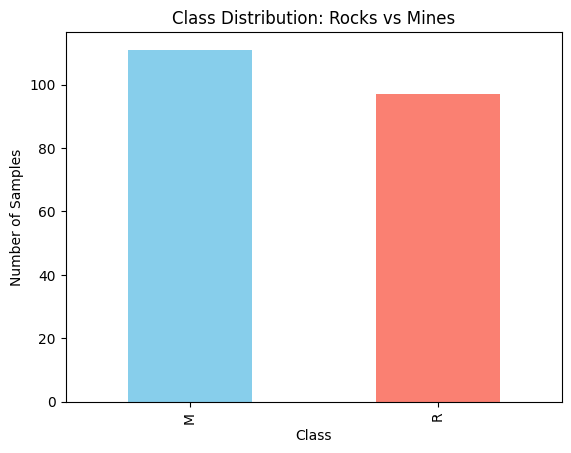

In [ ]:
sonar_data[60].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution: Rocks vs Mines")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
sonar_data.describe()

In [ ]:
sonar_data[60].value_counts()

so we have 111 samples that are mines and 97 samples that are rocks. The big difference would have reduced our accuracy score

some values of the first column correspond to rocks and some to mines

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
# separating data and labels because it is a supervised learning problem
X = sonar_data.drop(columns=60,axis=1)
Y = sonar_data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


Training Model is Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

Model evaluation

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
training_model_accuracy = accuracy_score(X_train_prediction,Y_train)


In [ ]:
print("accuracy of training data is: ", training_model_accuracy)

accuracy of training data is:  0.8342245989304813


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("accuracy of test data is: ", test_data_accuracy)

accuracy of test data is:  0.7619047619047619


Making a Predictive System

In [ ]:
input_data = (0.0239,0.0189,0.0466,0.0440,0.0657,0.0742,0.1380,0.1099,0.1384,0.1376,0.0938,0.0259,0.1499,0.2851,0.5743,0.8278,0.8669,0.8131,0.9045,0.9046,1.0000,0.9976,0.9872,0.9761,0.9009,0.9724,0.9675,0.7633,0.4434,0.3822,0.4727,0.4007,0.3381,0.3172,0.2222,0.0733,0.2692,0.1888,0.0712,0.1062,0.0694,0.0300,0.0893,0.1459,0.1348,0.0391,0.0546,0.0469,0.0201,0.0095,0.0155,0.0091,0.0151,0.0080,0.0018,0.0078,0.0045,0.0026,0.0036,0.0024)
input_data_as_numpy_array = np.asarray(input_data)

In [ ]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = model.predict(input_data_reshaped)
print(prediction)

['R']
